## Lab 3 z Podstaw Uczenia Maszynowego - Klasyfikacja Logistyczna
### Autor: Dominik Pabiniak
### Nr indeksu: 254397

In [24]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics


from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [83]:
def sensitivity(m_p):
    return round((m_p[0][0]/(m_p[0][0] + m_p[0][1])), 4)
def specificity(m_p):
    return round((m_p[1][1]/(m_p[1][0] + m_p[1][1])), 4)

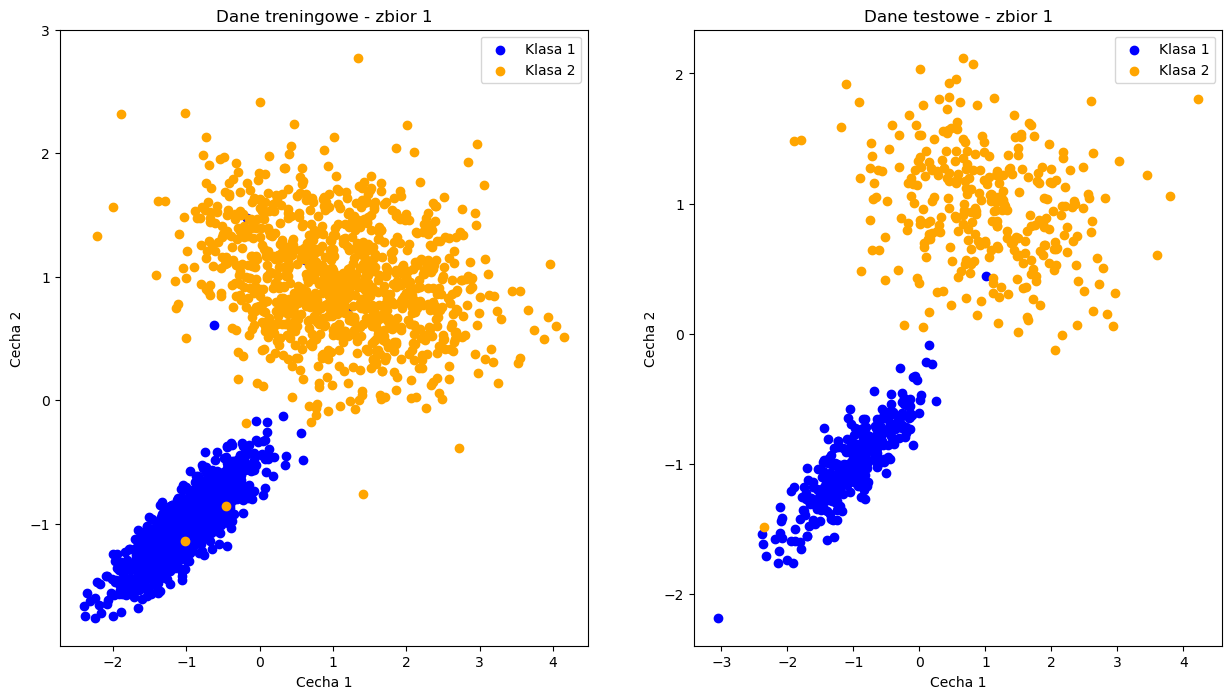

In [25]:
scaler = MinMaxScaler()
# Dane wejsciowe
X, t = make_classification(n_samples=2597, n_features=2, n_clusters_per_class=1, n_redundant=0, random_state=254397)

#Podzial na podzbiory
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X, t, test_size=0.25, random_state=254397)


# Podzial zbiorow na klasy w celu ich wyswietlenia
klasa_0_train = X_syn_train[(y_syn_train == 0)]
klasa_1_train = X_syn_train[(y_syn_train == 1)]
klasa_0_test = X_syn_test[(y_syn_test == 0)]
klasa_1_test = X_syn_test[(y_syn_test == 1)]

# Wyswietlenie danych
_, axs = plt.subplots(1, 2, figsize=(15, 8))
ax = axs[0]
ax.scatter(klasa_0_train[:,0], klasa_0_train[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_train[:,0], klasa_1_train[:,1], c = "orange", label="Klasa 2")
ax.set_title("Dane treningowe - zbior 1")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

ax = axs[1]
ax.scatter(klasa_0_test[:,0], klasa_0_test[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_test[:,0], klasa_1_test[:,1], c = "orange", label="Klasa 2")
ax.set_title("Dane testowe - zbior 1")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

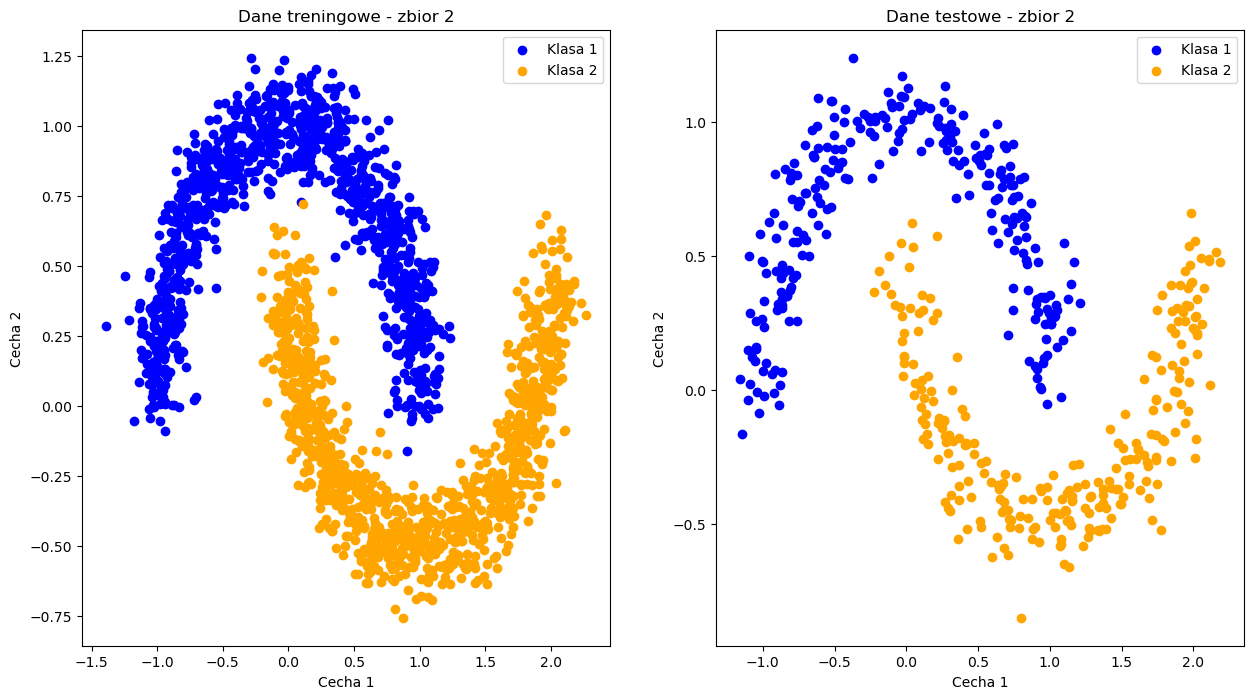

In [26]:
# Dane wejsciowe
X_m, t_m = make_moons(n_samples=2597, random_state=254397, noise=0.1)

#Podzial na podzbiory
X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(X_m, t_m, test_size=.2, random_state=254397)

# Podzial zbiorow na klasy w celu ich wyswietlenia
klasa_0_train_M = X_train_M[(y_train_M == 0)]
klasa_1_train_M = X_train_M[(y_train_M == 1)]
klasa_0_test_M = X_test_M[(y_test_M == 0)]
klasa_1_test_M = X_test_M[(y_test_M == 1)]

# Wyswietlenie danych
_, axs = plt.subplots(1, 2, figsize=(15, 8))
ax = axs[0]
ax.scatter(klasa_0_train_M[:,0], klasa_0_train_M[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_train_M[:,0], klasa_1_train_M[:,1], c = "orange", label="Klasa 2")
ax.set_title("Dane treningowe - zbior 2")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

ax = axs[1]
ax.scatter(klasa_0_test_M[:,0], klasa_0_test_M[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_test_M[:,0], klasa_1_test_M[:,1], c = "orange", label="Klasa 2")
ax.set_title("Dane testowe - zbior 2")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

In [77]:
class LogisticRegression:
    def __init__(self, eta, num_iterations):
        self.eta = eta
        self.num_iterations = num_iterations
        self.theta = None
        

    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

    def fit(self, X, y):
        _, num_features = X.shape
        self.theta = np.zeros(num_features)
        

        for _ in range(self.num_iterations):
            linear_model = X @ self.theta
            y_predicted = self.sigmoid(linear_model)

            dw = (y_predicted - y) @ X
            self.theta -= self.eta * dw

    def predict(self, X):
        linear_model = X @ self.theta
        y_predicted_prob = self.sigmoid(linear_model)
        y_predicted = [1 if i > 0.5 else 0 for i in y_predicted_prob]
        return np.array(y_predicted)

    def accuracy(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
    
    def plot_classification(self, X_pred_0, X_pred_1, y_pred):
        x_min, x_max = X_syn_test[:, 0].min() - 0.2, X_syn_test[:, 0].max() + 0.2
        y_min, y_max = X_syn_test[:, 1].min() - 0.2, X_syn_test[:, 1].max() + 0.2
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.figure(figsize=(10, 8))
        plt.contourf(xx, yy, Z, alpha=0.2)
        plt.scatter(X_pred_0[:, 0], X_pred_0[:, 1], marker='.', label='Klasa 1')
        plt.scatter(X_pred_1[:, 0], X_pred_1[:, 1], marker='.', label='Klasa 2')
        plt.title('Powierzchnia decyzyjna')
        plt.xlabel('Cecha 1')
        plt.ylabel('Cecha 2')
        plt.legend()

Macierz pomylek: 
[[334   1]
 [  2 313]]
Dokladnosc: 0.9953846153846154
Czulosc: 0.997
Swoistosc: 0.9937


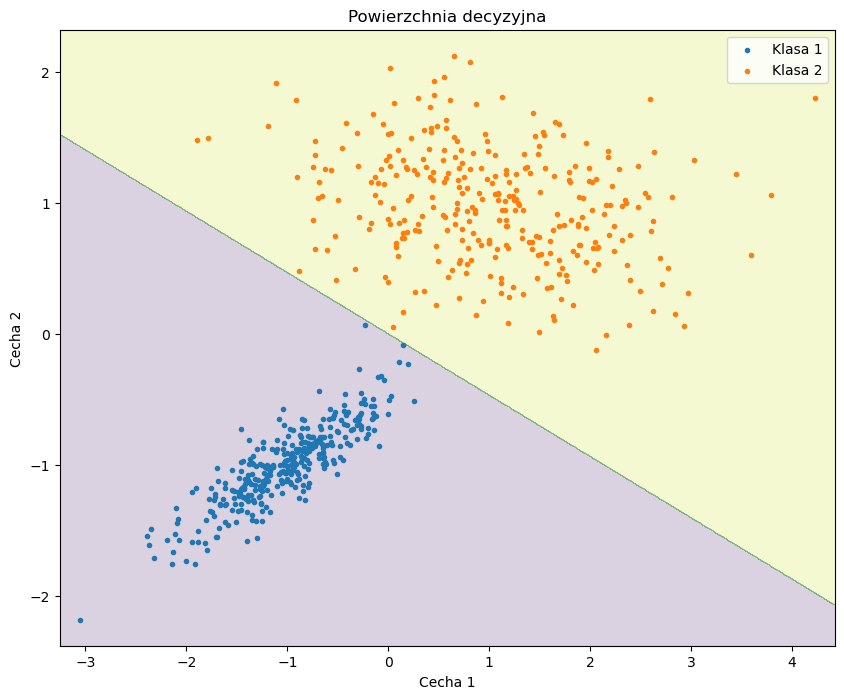

In [84]:
model = LogisticRegression(eta=0.01, num_iterations=100)
model.fit(X_syn_train, y_syn_train)

y_pred = model.predict(X_syn_test)


accuracy = accuracy_score(y_syn_test, y_pred)
c_matrix = confusion_matrix(y_syn_test, y_pred)
print(f'Macierz pomylek: \n{c_matrix}')
print(f'Dokladnosc: {accuracy}\nCzulosc: {sensitivity(c_matrix)}\nSwoistosc: {specificity(c_matrix)}')

X_pred_0 = X_syn_test[y_pred == 0]
X_pred_1 = X_syn_test[y_pred == 1]

model.plot_classification(X_pred_0, X_pred_1, y_pred)